# Get started

## Overview

The `pywdpa` Python package is an interface to the World Database on Protected Areas (WDPA)
hosted on the Protected planet website: <https://www.protectedplanet.net>.
It allows users to download spatial shapefiles of protected areas (PA) for world countries using the Protected Planet API (<https://api.protectedplanet.net>).

This package contains two main functions:

- `.get_token()`: check if your WDPA token is correctly stored (see [usage](https://ecology.ghislainv.fr/pywdpa/reference.html#module-pywdpa.get_token));
- `.get_wdpa()`: download the shapefile of protected areas for one specific country (see [usage](https://ecology.ghislainv.fr/pywdpa/reference.html#module-pywdpa.get_wdpa)).


## Installation

You will need several dependencies to run the `pywdpa` Python package (`numpy`, `gdal`, and `requests`). The best way to install the package is to create a Python virtual environment, either through `virtualenv` or `conda`. A virtual environment is a self-contained directory tree that contains a Python installation for a particular version of Python, plus a number of additional packages.

### Using `virtualenv`

You first need to have the `virtualenv` package installed (see [here](https://packaging.python.org/guides/installing-using-pip-and-virtual-environments/)).

Then, create a virtual environment and install the `pywdpa` package with the following commands:

```shell
# In a shell
cd ~
mkdir venvs # Directory for virtual environments
cd venvs
virtualenv --python=/usr/bin/python3 venv-pywppa
source ~/venvs/venv-far/bin/activate
pip install pywdpa # For PyPI version, this will install all other dependencies
# pip install https://github.com/ghislainv/pywdpa/archive/master.zip # For GitHub dev version
# pip install geopandas descartes folium python-dotenv # Optional additional packages
```

To deactivate and delete the virtual environment:

```shell
deactivate
rm -R ~/venvs/venv-pywdpa # Just remove the repository
```

### Using `conda`

You first need to have `miniconda3` installed (see [here](https://docs.conda.io/en/latest/miniconda.html)).

Then, create a conda environment (details [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html)) and install the `pywdpa` package with the following commands:

```shell
# In a shell
conda create --name conda-pywdpa python pip numpy gdal requests --yes
conda activate conda-far
# conda install geopandas --yes  # Optional additional packages available in conda
# conda install -c conda-forge descartes folium python-dotenv --yes  # Optional additional packages available in conda
pip install pywdpa # Install PyPI version
# pip install https://github.com/ghislainv/pywdpa/archive/master.zip # For GitHub dev version
```

To deactivate and delete the conda environment:

```shell
conda deactivate
conda env remove --name conda-pywdpa
```

## Managing the WDPA API token

This package uses the Protected Planet API to access data on world protected areas. You must first have obtained a Personal API Token by
filling in the form available at <https://api.protectedplanet.net/request>. Then you need to set an
environment variable (we recommend using the name `WDPA_KEY`) using either the command `os.environ["WDPA_KEY"]="your_token"` or
[python-dotenv](https://github.com/theskumar/python-dotenv).    

The validity of your token can be checked with function `.get_token()`.

```python
# In Python
import os
import pywdpa

# Set WDPA_KEY
# (assuming that your token is "ca4703ffba6b9a26b2db73f78e56e088")
os.environ["WDPA_KEY"]="ca4703ffba6b9a26b2db73f78e56e088"

# Check your token validity
pywdpa.get_token()
```

If your token is valid, the function will return its value. Otherwise it will print an error message.

## Downloading protected areas

The function `.get_wdpa()` can be used to download the shapefile of protected areas for the Reunion Island which has the iso code "REU". The output file name in the working directory will be "pa_REU.shp".

In [1]:
import pywdpa

pywdpa.get_wdpa("REU")

The shapefile can be imported in the Python environment, for example using the Python package `geopandas`.

In [2]:
import geopandas as gpd

pa_REU = gpd.read_file("pa_REU.shp")
pa_REU.head()

,wdpa_id,pa_name,orig_name,ctry_iso3,owner_type,is_marine,type,iucn_cat,status,date,year,geometry
0,62780,Bois De Nèfles-Saint-Paul,Bois De Nèfles-Saint-Paul,REU,Not Reported,False,Forest Integral Biological Reserve,Ia,Designated,01/01/1985,1985,"POLYGON ((55.38600 -21.03200, 55.37700 -21.027..."
1,62786,Hauts De Saint-Philippe,Hauts De Saint-Philippe,REU,Not Reported,False,Forest Integral Biological Reserve,Ia,Designated,01/01/1987,1987,"POLYGON ((55.72300 -21.33500, 55.71100 -21.337..."
2,62787,Les Mares,Les Mares,REU,Not Reported,False,Forest Integral Biological Reserve,Ia,Designated,01/01/1987,1987,"POLYGON ((55.72300 -21.18300, 55.73900 -21.179..."
3,83081,Bois Blanc,Bois Blanc,REU,Not Reported,False,Land Acquired By Conservatoire Du Littoral (Na...,IV,Designated,01/01/1980,1980,"MULTIPOLYGON (((55.80000 -21.19700, 55.81900 -..."
4,83112,Grande Anse,Grande Anse,REU,Not Reported,True,Land Acquired By Conservatoire Du Littoral (Na...,IV,Designated,01/01/1982,1982,"MULTIPOLYGON (((55.54900 -21.36800, 55.54800 -..."


Protected areas can be plotted using either the `.plot` function from the geopandas object or using the Python package `folium` which makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map.

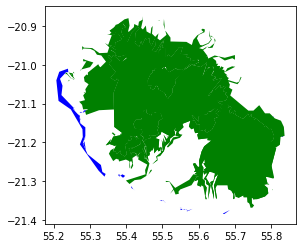

In [3]:
from matplotlib.colors import ListedColormap
cm = ListedColormap(["green", "blue"])
pa_REU.plot(column="is_marine", cmap=cm)

In [4]:
import folium
latitude = -21.1
longitude = 55.5
fcol = lambda x: {
    'fillColor': "blue" if x["properties"]["is_marine"] == "True" else "green",
    'color': "blue" if x["properties"]["is_marine"] == "True" else "green"
}
m = folium.Map(location = [latitude, longitude],
               zoom_start = 10)
folium.GeoJson(pa_REU.to_json(), style_function=fcol).add_to(m)
m

## Command line 

The function `.get_wdpa()` can be directly executed in a shell using the `pywdpa` command followed by the country iso code as argument. This will download the shapefile of the protected areas for the Reunion Island in the current working directory.

In [5]:
%%bash
# In a shell
pywdpa REU

Executing pywdpa version 0.1.5.
For country with isocode: REU.
